In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rooth_path = '../data/training/'
power_df = pd.read_csv(rooth_path + 'Power_curve.csv')
failures_df = pd.read_csv(rooth_path + 'wind-farm-1-failures-training.csv')
signals_df = pd.read_csv(rooth_path + 'wind-farm-1-signals-training.csv', delimiter=';')
logs_df = pd.read_csv(rooth_path + 'wind-farm-1-logs-training.csv')
met_df = pd.read_csv(rooth_path + 'wind-farm-1-metmast-training.csv', delimiter=';')

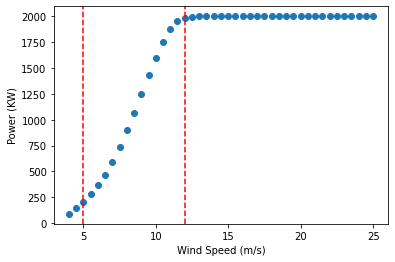

In [3]:
# See normal curve of a wind turbine
plt.scatter(x='Wind speed (m/s)', y='Power (kW)', data=power_df)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (KW)")
plt.axvline(x=5, color='red', linestyle= '--')
plt.axvline(x=12, color='red', linestyle= '--')

By Research:

• Region 1: Includes the time when the turbine is starting up;

• Region 2: Operational region in which it is desirable to seize as much wind power as possible;

• Region 3: Wind speeds are relatively high (rated wind speed) and force the turbine to limit the fraction of wind power captured, for electrical and mechanical safety.

### First analysis of behaviour per turbine

In [4]:
signals_df.head()

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T11,2016-01-01T00:00:00+00:00,1339.4,1233.3,1270.9,18.8,42.0,59,61,60,...,-973.4,-752.6,-1000.0,56.5,973.4,1000.0,752.6,56.5,38,206.9
1,T06,2016-01-01T00:00:00+00:00,1270.0,1232.8,1248.5,6.8,42.0,51,52,53,...,-307.1,0.0,-880.6,180.0,307.1,880.6,0.0,180.0,35,204.6
2,T01,2016-01-01T00:00:00+00:00,1277.4,1226.1,1249.0,9.0,41.0,58,59,58,...,-144.4,0.0,-584.5,157.1,144.4,584.5,0.0,157.1,37,218.5
3,T09,2016-01-01T00:00:00+00:00,1376.7,1234.3,1272.0,24.7,40.0,58,57,58,...,-861.6,-224.5,-1000.0,185.5,861.6,1000.0,224.5,185.5,33,214.0
4,T07,2016-01-01T00:00:00+00:00,1317.5,1229.5,1254.9,13.8,41.0,62,62,61,...,-536.5,0.0,-1000.0,338.9,536.5,1000.0,0.0,338.9,39,197.3


In [5]:
#Group by Turbine and Timestamp
signals = signals_df.groupby(by=['Turbine_ID', 'Timestamp']).mean().reset_index()

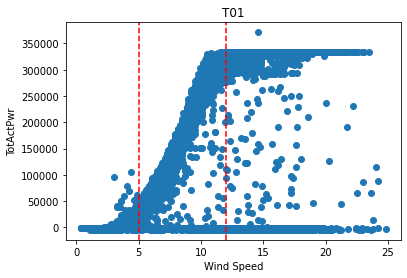

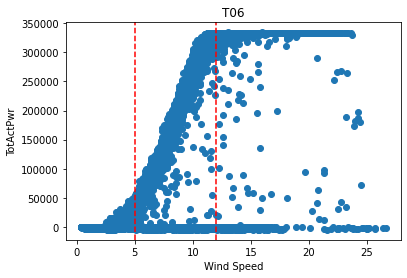

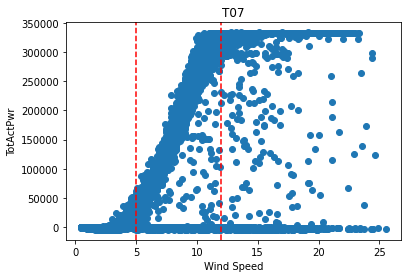

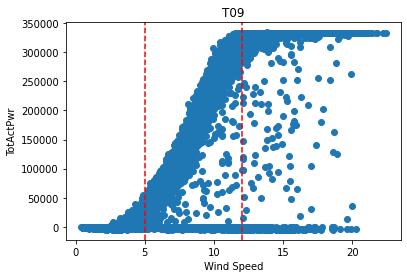

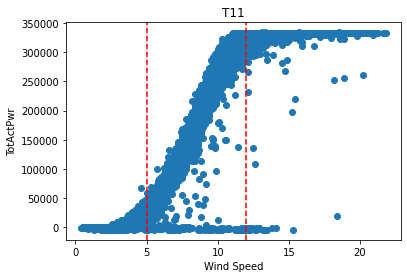

In [6]:
#Plot behaviour for all turbines
turbines = ['T01', 'T06', 'T07', 'T09', 'T11']
for turbine in turbines:
    temp = signals[signals['Turbine_ID']==turbine]
    plt.scatter(x='Amb_WindSpeed_Avg', y='Prod_LatestAvg_TotActPwr', data=temp)
    plt.title(turbine)
    plt.xlabel("Wind Speed")
    plt.ylabel("TotActPwr")
    plt.axvline(x=5, color='red', linestyle= '--')
    plt.axvline(x=12, color='red', linestyle= '--')
    plt.show()

##### We can see that there are some records that show a not normal behaviour of the wind turbine. Something to explore

### Lets see failures per turbine and component

In [7]:
failures_df['Timestamp'] = pd.to_datetime(failures_df['Timestamp'])
failures_df.head()

,Turbine_ID,Component,Timestamp,Remarks
0,T11,GENERATOR,2016-03-03 19:00:00+00:00,Electric circuit error in generator
1,T06,HYDRAULIC_GROUP,2016-04-04 18:53:00+00:00,Error in pitch regulation
2,T07,GENERATOR_BEARING,2016-04-30 12:40:00+00:00,High temperature in generator bearing (replace...
3,T09,GENERATOR_BEARING,2016-06-07 16:59:00+00:00,High tempemperature generator bearing
4,T07,TRANSFORMER,2016-07-10 03:46:00+00:00,High temperature transformer


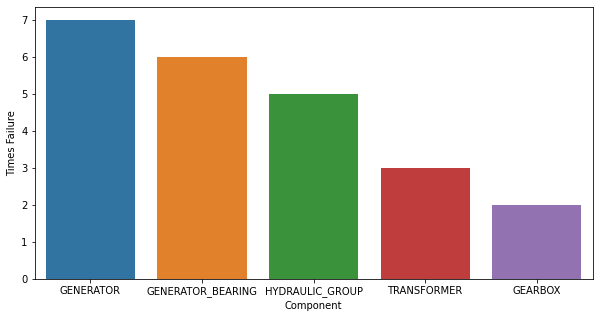

In [8]:
#Number of failures by each component
fig = plt.figure(figsize=(10,5))
nu = failures_df['Component'].value_counts().reset_index()
nu.columns = ['Component','Times Failure']
ax = sns.barplot(x='Component', y='Times Failure', data=nu)

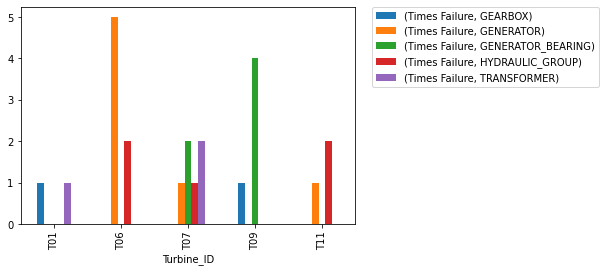

In [9]:
#Failures of components by Turbine
failures_df_by_turbine = failures_df.groupby(['Turbine_ID'])['Component'].value_counts()
failures_df_by_turbine = failures_df_by_turbine.to_frame()
failures_df_by_turbine.columns = ['Times Failure']
temp = failures_df_by_turbine.unstack()
temp.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

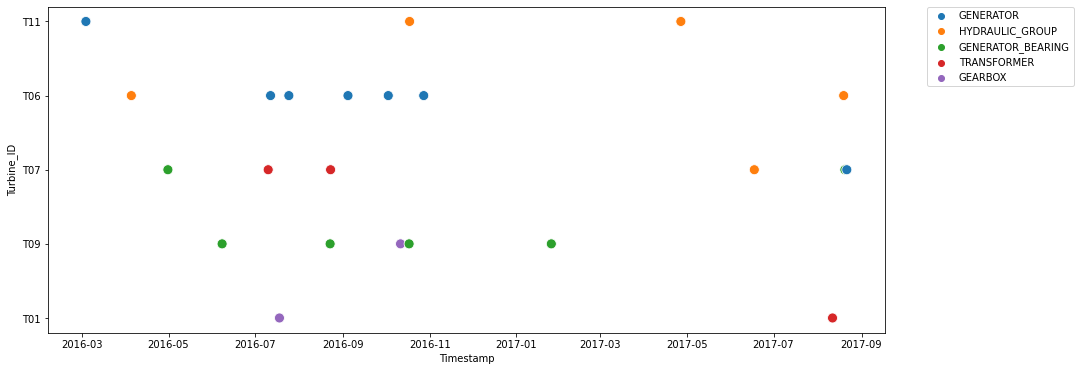

In [10]:
#Failures by component and Turbine across time
turbine_id_list = failures_df['Turbine_ID'].tolist()
component_id_list = failures_df['Component'].tolist()

fig = plt.figure(figsize=(15,6))
sns.scatterplot(x='Timestamp', y=turbine_id_list, hue=component_id_list, data=failures_df, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Turbine_ID')
plt.xlabel('Timestamp')
plt.show()

#### Next Steps:

- Data wrangling, feature engineering and exploratory analysis
- We will analyze the periods before and after failure to see if we can see a correlation with the failures
- Feature Selection 
- Training